<a href="https://colab.research.google.com/github/mathiasjlopez/ML_para_el_consumo_de_FyV/blob/main/Proyecto_ML_para_el_consumo_de_FyV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primeros pasos en la implementacion de ML en la Encuesta nacional de Factores de Riesgo (ENFR)**



**Contexto**

La Encuesta Nacional de Factores de Riesgo (ENFR) forma parte del Sistema de Vigilancia de Enfermedades No
Transmisibles (ENT) y del Sistema Integrado de Encuestas a Hogares (SIEH). Proporciona información válida,
confiable y oportuna sobre factores de riesgo (como consumo de tabaco, alcohol, alimentación, actividad
física, entre otros), procesos de atención en el sistema de salud y principales ENT en la población argentina
(hipertensión, diabetes, obesidad y otras).Fue realizada con anterioridad en los años 2005, 2009, 2013 y 2018.

Los pasos a seguir para lograr la implementacion:

- Preanalisis de la base datos
- Preprocesamiento y limpieza de los datos
- Exploracion rapida (ya se trabajo con esta base de datos)
- Preparación y predicciones de modelos ML: Regresión Logistica y Random Forests

In [1]:
# Conectar con el archivo desde la compu
from google.colab import files

uploaded = files.upload()


Saving ENFR 2018 - Base usuario.txt to ENFR 2018 - Base usuario.txt


In [2]:
# Cargado de la base de datos y librerias

import pandas as pd
import numpy as np


bd  = pd.read_csv("ENFR 2018 - Base usuario.txt", sep = "|")

bd

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,...,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
0,1128639,2,1,1,1,1,1,3,2,1,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2378,4464,0
1,1709939,2,1,1,1,1,0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3588,0,0
2,6874130,2,1,1,1,1,0,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740,0,0
3,10319375,2,1,1,1,1,1,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493,0,0
4,11140857,2,1,1,1,1,0,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29219,2092256226,94,6,4,9,0,0,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203,0,0
29220,2097771079,94,6,4,9,0,1,1,4,1,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1042,1530,0
29221,2101464264,94,6,4,9,0,1,1,3,1,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,441,813,0
29222,2116612011,94,6,4,9,0,0,1,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,0,0


In [ ]:
#print('Dimensiones de la base de datos:', bd.shape)

bd.info()

Dimensiones de la base de datos: (29224, 287)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29224 entries, 0 to 29223
Columns: 287 entries, id to wf3p
dtypes: float64(186), int64(101)
memory usage: 64.0 MB


# Estructura de los datos:

- La base de datos usada (ENFR 2019) tiene 29224 filas y 287 columnas.
- El tipo de datos con el que cuenta: numericos enteros y flotantes.
- Toda la base esta codificada con codigos preseleccionados y estructurados (link a "diccionario de registro de usuario").
- Con ayuda del "diccionario de registro de usuario" se seleccionaron las variables que van a ser utilizadas de aca en adelante.
- A primera vista, la base de datos cruda esta bastante bien estructurada: no hay espacios en blanco, ni problemas de con los que lidiar.

**Pasos generales a seguir:**

Se seleccionaran las colunas/variables a incluir en los modelos y se las recodificara para su trabajo posterior. Luego se trabajaran los NAN, identificando si son por algun tipo de error a la hora de abrir el archivo o si son datos faltantes reales, para poder decidir si se eliminaran o se los analiza mas a fondo.

In [3]:
# Regresion logistica

## Seleccion de las columnas
bd1 = bd[['cod_provincia',  'region', 'bhih01', 'quintil_uc', 'bhch03', 'bhch04', 'rango_edad', 'nivel_instruccion', 'cobertura_salud', 'condicion_actividad', 'bisg01' , 'nivel_actividad_fisica', 'barreras_actividad_fisica' ,'bhch05' ,'bhch02', 'promedio_fv_diario', 'barreras_fyv', 'bial08']].copy()

## Renombramos las columnas
bd1 = bd1.rename(columns ={'cod_provincia' : 'provincia' , 'bhih01' : 'ingreso_mensual_pesos_hogar', 'quintil_uc' : 'quintil_ingreso' , 'bhch03' : 'genero' , 'bhch04' : 'edad', 'rango_edad' : 'rango_edad' , 'nivel_instruccion' : 'nivel_de_instruccion', 'condicion_actividad' : 'sit_laboral', 'cobertura_salud' : 'cobertura_salud', 'bisg01' : 'salud_general', 'bhch05' : 'sit_conyugal', 'bhch02' : 'relacion_con_jefe_hogar', 'bial08' : 'tipo_alimentacion' })

bd1.columns


# Random Forests

## Seleccion de las columnas
bd2 = bd[['cod_provincia',  'region', 'bhih01', 'quintil_uc', 'bhch03', 'bhch04', 'rango_edad', 'nivel_instruccion', 'cobertura_salud', 'condicion_actividad', 'bisg01' , 'nivel_actividad_fisica', 'barreras_actividad_fisica' ,'bhch05' ,'bhch02', 'promedio_fv_diario', 'barreras_fyv', 'bial08']].copy()

## Renombramos las columnas
bd2 = bd1.rename(columns ={'cod_provincia' : 'provincia' , 'bhih01' : 'ingreso_mensual_pesos_hogar', 'quintil_uc' : 'quintil_ingreso' , 'bhch03' : 'genero' , 'bhch04' : 'edad', 'rango_edad' : 'rango_edad' , 'nivel_instruccion' : 'nivel_de_instruccion', 'condicion_actividad' : 'sit_laboral', 'cobertura_salud' : 'cobertura_salud', 'bisg01' : 'salud_general', 'bhch05' : 'sit_conyugal', 'bhch02' : 'relacion_con_jefe_hogar', 'bial08' : 'tipo_alimentacion' })

bd2.columns

Index(['provincia', 'region', 'ingreso_mensual_pesos_hogar', 'quintil_ingreso',
       'genero', 'edad', 'rango_edad', 'nivel_de_instruccion',
       'cobertura_salud', 'sit_laboral', 'salud_general',
       'nivel_actividad_fisica', 'barreras_actividad_fisica', 'sit_conyugal',
       'relacion_con_jefe_hogar', 'promedio_fv_diario', 'barreras_fyv',
       'tipo_alimentacion'],
      dtype='object')

In [4]:
# Re- y codificación las variables al tipo de dato y niveles correspondientes para la base de datos bd1


bd1['genero'] = bd1['genero'].replace({1 : 'varon', 2 : 'mujer'}).astype('category')

bd1['nivel_de_instruccion'] = bd1['nivel_de_instruccion'].map({1:'primario',
                                                              2: 'primario',
                                                              3: 'primario',
                                                              4: 'secundario',
                                                              5: 'secundario',
                                                              6: 'terciario_universitario',
                                                              7: 'terciario_universitario'}).astype('category') # Uso Map para que me transforme al grupo 8 (educacion especial) en 'NAN' que luego sera eliminado

bd1['provincia'] = bd1['provincia'].replace({2 : 'CABA',
                                              6 : 'Buenos Aires',
                                              10: 'Catamarca',
                                              22: 'Chaco',
                                              26: 'Chubut',
                                              14: 'Cordoba',
                                              18: 'Corrientes',
                                              30: 'Entre Rios',
                                              34: 'Formosa',
                                              38: 'Jujuy',
                                              42: 'La Pampa',
                                              46: 'La Rioja',
                                              50: 'Mendoza',
                                              54: 'Misiones',
                                              58: 'Neuquen',
                                              62: 'Rio Negro',
                                              66: 'Salta',
                                              70: 'San Juan',
                                              74: 'San Luis',
                                              78: 'Santa Cruz',
                                              82: 'Santa Fe',
                                              86: 'Santiago del Estero',
                                              90: 'Tucuman',
                                              94: 'Tierra del Fuego'}).astype('category')



bd1['cobertura_salud'] = bd1['cobertura_salud'].replace({1 : 'cob_privada', 2 : 'cob_publica'}).astype('category')

bd1['sit_laboral'] = bd1['sit_laboral'].replace({1: 'ocupado', 2: 'desocupado', 3: 'inactivo'})

bd1['salud_general'] = bd1['salud_general'].replace({1: 'excelente',
                                                     2: 'muy_buena',
                                                     3: 'buena',
                                                     4: 'regular',
                                                     5: 'mala'}).astype('category')

bd1['nivel_actividad_fisica'] = bd1['nivel_actividad_fisica'].replace({1: 'alto', 2: 'medio', 3: 'bajo', 99: 'Ns/Nc'}).astype('category')

bd1['barreras_actividad_fisica'] = bd1['barreras_actividad_fisica'].replace({1: 'falta de tiempo',
                                                                             2: 'falta de dinero',
                                                                             3: 'falta instalaciones',
                                                                             4: 'por distancia',
                                                                             5: 'por razones de salud',
                                                                             6: 'falta de informacion',
                                                                             7: 'falta de seguridad',
                                                                             8: 'no le interesa/no le gusta',
                                                                             9: 'falta de voluntad',
                                                                             10: 'otro',
                                                                             11: 'hace la cantidad que necesita',
                                                                             12: 'razones climaticas',
                                                                             13: 'por cuidado personal'}).astype('category')

bd1['sit_conyugal'] = bd1['sit_conyugal'].replace({1: 'unidx',
                                                   2: 'casadx',
                                                   3: 'separadx',
                                                   4: 'divorciadx',
                                                   5: 'viudx',
                                                   6: 'solterx'}).astype('category')

bd1['relacion_con_jefe_hogar'] = bd1['relacion_con_jefe_hogar'].replace({1: 'jefe de hogar',
                                                                         2: 'pareja',
                                                                         3: 'hijx',
                                                                         4: 'padre/madre',
                                                                         5: 'hermanx',
                                                                         6: 'suegrx',
                                                                         7: 'yernx',
                                                                         8: 'nietx',
                                                                         9: 'otro familiar',
                                                                         10:'otro no familiar'}).astype('category')

bd1['barreras_fyv'] = bd1['barreras_fyv'].replace({1: 'factores individuales',
                                                   2: 'factores externos',
                                                   3: 'factores economico',
                                                   4: 'come lo que considera adecuado',
                                                   5: 'otros'}).astype('category')

bd1['tipo_alimentacion'] = bd1['tipo_alimentacion'].replace({1: 'muy saludable',
                                                             2: 'bastante saludable',
                                                             3: 'poco saludable',
                                                             4: 'nada saludable',
                                                             99: 'Ns/Nc'}).astype('category')

bd1['rango_edad'] = bd1['rango_edad'].astype('category')

bd1['region'] = bd1['region'].astype('category')

bd1['cumple_nocumple'] = np.where(bd1['promedio_fv_diario']>=  3, 1, 0)
#bd1['cumple_nocumple'] = bd1['promedio_fv_diario'].astype('category')

bd1['quintil_ingreso'] = bd1['quintil_ingreso'].astype('category')


In [ ]:
bd1.dtypes

,0
provincia,category
region,category
ingreso_mensual_pesos_hogar,int64
quintil_ingreso,category
genero,category
edad,int64
rango_edad,category
nivel_de_instruccion,category
cobertura_salud,category
sit_laboral,object


In [ ]:
# Verificamos si hay NAN y cuantos por columnas

for i in bd1.columns:
  cant_nan = bd1[i].isna().sum()
  print(f'Cantidad de NAN {i}: {cant_nan}')

# Otra opcion rapida

print(bd1.isna().sum())

# Total de NAN

print('Cantidad total:',(bd1.isna().sum()).sum())

# Total de datos

print("Cantidad total de datos:", len(bd1))

#  Porcentaje de NAN en la base de datos

print('Porcentaje de NAN:', (bd1.isna().sum()).sum()*100/len(bd1)) # Los NAN son el 3,6 % de mis datos totales. Se eliminan.



Cantidad de NAN provincia: 0
Cantidad de NAN region: 0
Cantidad de NAN ingreso_mensual_pesos_hogar: 0
Cantidad de NAN quintil_ingreso: 0
Cantidad de NAN genero: 0
Cantidad de NAN edad: 0
Cantidad de NAN rango_edad: 0
Cantidad de NAN nivel_de_instruccion: 47
Cantidad de NAN cobertura_salud: 0
Cantidad de NAN sit_laboral: 0
Cantidad de NAN salud_general: 0
Cantidad de NAN nivel_actividad_fisica: 254
Cantidad de NAN barreras_actividad_fisica: 0
Cantidad de NAN sit_conyugal: 0
Cantidad de NAN relacion_con_jefe_hogar: 0
Cantidad de NAN promedio_fv_diario: 753
Cantidad de NAN barreras_fyv: 0
Cantidad de NAN tipo_alimentacion: 0
Cantidad de NAN cumple_nocumple: 0
provincia                        0
region                           0
ingreso_mensual_pesos_hogar      0
quintil_ingreso                  0
genero                           0
edad                             0
rango_edad                       0
nivel_de_instruccion            47
cobertura_salud                  0
sit_laboral         

In [5]:
# Eliminamos los NAN

print('Cantidad de NAN:\n', (bd1.isna()).sum())

bd1 = bd1.dropna()

print('Cantidad de NAN:', (bd1.isna().sum()).sum())
print(len(bd1))

Cantidad de NAN:
 provincia                        0
region                           0
ingreso_mensual_pesos_hogar      0
quintil_ingreso                  0
genero                           0
edad                             0
rango_edad                       0
nivel_de_instruccion            47
cobertura_salud                  0
sit_laboral                      0
salud_general                    0
nivel_actividad_fisica         254
barreras_actividad_fisica        0
sit_conyugal                     0
relacion_con_jefe_hogar          0
promedio_fv_diario             753
barreras_fyv                     0
tipo_alimentacion                0
cumple_nocumple                  0
dtype: int64
Cantidad de NAN: 0
28189


In [6]:
print('Cantidad de NAN por feature:\n',(bd2.isna()).sum())

bd2 = bd2.dropna()

print('\nCantidad de NAN:', (bd2.isna().sum()).sum())

Cantidad de NAN por feature:
 provincia                        0
region                           0
ingreso_mensual_pesos_hogar      0
quintil_ingreso                  0
genero                           0
edad                             0
rango_edad                       0
nivel_de_instruccion             0
cobertura_salud                  0
sit_laboral                      0
salud_general                    0
nivel_actividad_fisica         254
barreras_actividad_fisica        0
sit_conyugal                     0
relacion_con_jefe_hogar          0
promedio_fv_diario             753
barreras_fyv                     0
tipo_alimentacion                0
dtype: int64

Cantidad de NAN: 0


>

In [7]:
# Vemos si hay filas duplicadas, aunque en una encuesta podria existir, aunque poco frecuente, la posibilidad de que hayan filas iguales de individuos diferentes

bd1.duplicated().sum() # hay 8 filas duplicadas

# De que columnas vienen


# Eliminamos las filas ya que son pocas y voy a realizar modelos predictictivos y no quiero que haya informacion cruzada

bd1 = bd1.drop_duplicates()

In [8]:
print('Cantidad de filas duplicadas:', bd2.duplicated().sum())

bd2 = bd2.drop_duplicates()

Cantidad de filas duplicadas: 8


# Descriptiva de la base de datos

In [ ]:
# Estadisticas resumenes

bd1.describe() # Describe a las variables numericas

bd1.describe(include='all') # Para todo

,provincia,region,ingreso_mensual_pesos_hogar,quintil_ingreso,genero,edad,rango_edad,nivel_de_instruccion,cobertura_salud,sit_laboral,salud_general,nivel_actividad_fisica,barreras_actividad_fisica,sit_conyugal,relacion_con_jefe_hogar,promedio_fv_diario,barreras_fyv,tipo_alimentacion,cumple_nocumple
count,28181,28181.0,28181.000000,28181.0,28181,28181.000000,28181.0,28181,28181,28181,28181,28181,28181,28181,28181,28181.000000,28181,28181,28181.0
unique,24,6.0,NaN,5.0,2,NaN,5.0,3,2,3,5,3,13,6,10,NaN,5,5,185.0
top,Buenos Aires,2.0,NaN,4.0,mujer,NaN,3.0,secundario,cob_privada,ocupado,buena,bajo,falta de tiempo,casadx,jefe de hogar,NaN,come lo que considera adecuado,bastante saludable,2.0
freq,5363,9048.0,NaN,5804.0,16092,NaN,7780.0,11601,19703,17064,11804,13262,11128,8235,17006,NaN,12830,16145,2159.0
mean,NaN,NaN,22594.208935,NaN,NaN,46.584969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.069513,NaN,NaN,NaN
std,NaN,NaN,19849.329356,NaN,NaN,18.038589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706264,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,10000.000000,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,18000.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.570000,NaN,NaN,NaN
75%,NaN,NaN,30000.000000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.710000,NaN,NaN,NaN


## **Grafico de variables de interes**

Se visualizaran exploratoriamente algunas variables para entender cuales son sus categorias mas representativas y la distribucion de frecuencias. Esto permite tener una idea de la muestra con la que se trabajara, extrayendo la mayor infomacion de los datos crudos y obteniendo un preanalisis de los datos.



In [ ]:
# Libreria matplotlib para crear graficos
import seaborn as sn
import matplotlib.pyplot as plt

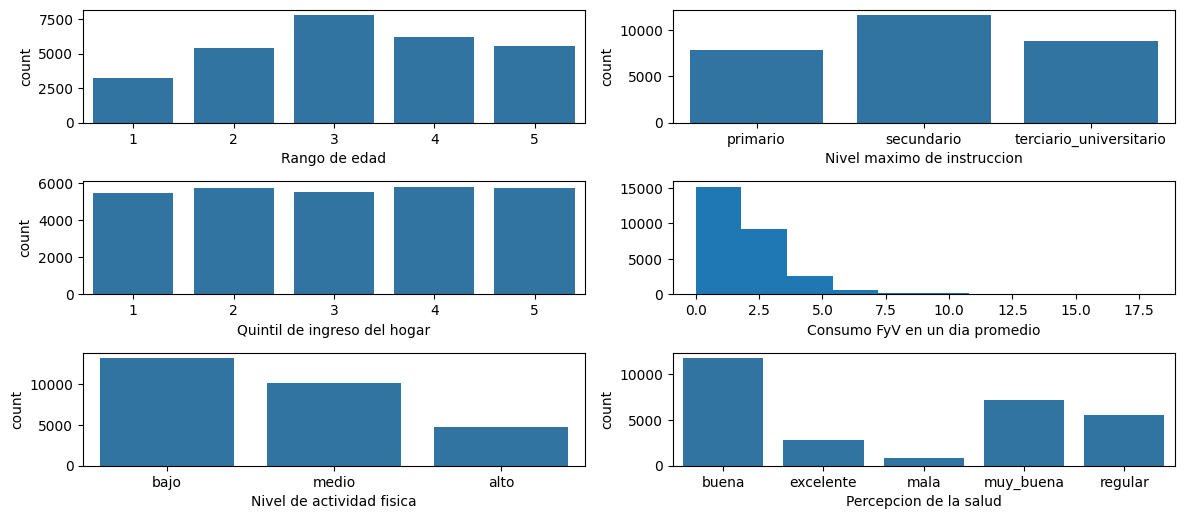

In [ ]:
plt.figure(figsize=(12, 10))  # Configuramos el tamaño del gráfico

# Rango edad
plt.subplot(6,2,1)
sn.countplot(x = 'rango_edad', data = bd1) # Grafico tipo histograma para variables categoricas
plt.xlabel('Rango de edad')

# Nivel de instruccion
plt.subplot(6,2,2)
sn.countplot(x = 'nivel_de_instruccion', data = bd1)
plt.xlabel('Nivel maximo de instruccion')

# Quintil de ingreso
plt.subplot(6,2,3)
sn.countplot(x = 'quintil_ingreso', data = bd1)
plt.xlabel('Quintil de ingreso del hogar')

# Consumo de FyV
plt.subplot(6,2,4)
plt.hist(bd1['promedio_fv_diario'], 10)
plt.xlabel('Consumo FyV en un dia promedio')

# Actividad fisica
plt.subplot(6,2,5)
sn.countplot(x = 'nivel_actividad_fisica', data = bd1, order=['bajo', 'medio', 'alto'])
plt.xlabel('Nivel de actividad fisica')

# Percepcion de la salud
plt.subplot(6,2,6)
sn.countplot(x = 'salud_general', data = bd1)
plt.xlabel('Percepcion de la salud')


plt.tight_layout() # Separa los graficos
plt.show()

- El grupo de encuestados de entre x y x edad son los que mas representados estan en la muestra, pero, en lineas generales, los 4 grupos que integran a los encuestados mayores de x edad presentan la misma cantidad de encuestados. (SE PODRIA HACER UN GRAFICO DE FR ACUMULADA).
- Los encuestados de nivel educativo maximo alcanzado con secundario son los que mas representan a la muestra, seguido por los universitarios.
- Hay un muestreo balanceado para los encuestados pertenecientes a los grupos de quintiles de ingresos.
- La mayoria de los encuestados no supero las 3 porciones diarias de FyV.
- La mayoria reporto tener un bajo nivel de actividad fisica, seguida por un nivel medio (cuanto suman medio y bajo?)
- La mayoria de los encuestados tiene una buena autopercepcion de su salud.

# *Ajustes de logaritmos de ML*
> Se utilizara la libreria scikit-learn para correr modelos de Regresion Logistica en la variable dicotomica creada "cumple o no cumple" con el minimo de frutas y verduras de 3 porciones dirarias recomendadas por la OMS (equivalentes a 400 gramos).

La OMS recomienda un consumo minimo diario de 400g de FyV para prevenir enfermedades cronicas no transmisibles —enfermedades cardio- y cerebrovasculares, algunos tipos de canceres y diabetes, y enfermedades respiratorias cronicas— y cubrir la necesidad de micronutrientes necesarias para el organismo. Por tal motivo, se creo una nueva variable dicotomica derivada del 'Promedio diario de FyV' —dato extraido de la ENFR 2019— con corte en 3 porciones (equivalentes a los 400gr, segun el tamaño de la porcion), para lo cual, superado ese umbral las personas cumplen con la recomendacion.

Antes de empezar a modelar, se cuantifica la cantidad de casos que cumplieron y que no cumplieron con el consumo de frutas y verduras recomendado:

In [ ]:
# Visualizamos de la muestra la cantidad de casos que cumplen o no cumplen
bd1['cumple_nocumple'].value_counts()

,count
cumple_nocumple,
0,21931
1,6250


> El 78% (21931) de las personas encuestadas **no cumplen** con el consumo minimo recomendado de FyV diarias y solo el 22% (6250) **si cumplen**.

La muestra se encuentra desbalanceada.

#Regrecion Logistica para el cumplimiento del consumo de FyV en base a las variables categoricas de interes


In [12]:
# Librerias

import matplotlib.pylab as plt # Para gráficos
import numpy as np # Para manejo de arrays, operaciones matemáticas, etc.
import pandas as pd
from sklearn.linear_model import LogisticRegression # El método de regresión logística que vamos a usar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve # función curva ROC de scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef


In [ ]:
# Scikit learn recibe arrays (.value para transformarlos) como parametros de dos dimenciones, con lo que hay que reshapear a las variables/columnas "features" en el caso de que este trabajando solo con 1, no lo pide para la variable respuesta.
# Scikit learn por default trabaja con polinomios de grado 1, para agregarles mas habria que armar un objeto con el polinomio que querramos y meterlo dentro de de la inicializacion.


##Bloque 1:

> El dataset se dividira en 70% de los datos para entrenar al modelo (y con los que se trabaja de aca en adelante) y un 30% para evaluar. Este ultimo porcentaje de datos no se volvera a tocar hasta llegar al ultimo paso.

In [ ]:
variables = [ 'quintil_ingreso',
       'genero', 'edad', 'nivel_de_instruccion',
       'cobertura_salud', 'salud_general',
       'nivel_actividad_fisica', 'sit_conyugal', 'barreras_fyv',
       'tipo_alimentacion']
X_df = bd1[variables].copy()
y = bd1['cumple_nocumple'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, stratify=y, random_state=42)

# stratify=y = que el train y test tengan la misma proporción de clases.
# random_state=42 = que siempre te toque el mismo train/test al correr el código.

**AGREGAR CUANTOS DATOS de cumple no cumple SE VAN PARA CADA DATA SET**

In [ ]:
print('Tamaño de y_train:', len(y_train))
print('Tamaño de y_test:', len(y_test))
print('Tamaño de X_train:', len(X_train))
print('Tamaño de X_test:', len(X_test))

Tamaño de y_train: 19726
Tamaño de y_test: 8455
Tamaño de X_train: 19726
Tamaño de X_test: 8455


## Bloque 2:

In [10]:
#############
#     A     #
#############

# Creacion de funcion para poder hallar hiperpatametros en RL con features categoricos

def cv_auc_logreg_ohe(X_df, y, features_cat, features_num = None, C=1.0, penalty="l2"):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    # columnas categóricas
    columnas_cat = features_cat

    for tr_idx, val_idx in skf.split(X_df, y):
        X_tr_df, X_val_df = X_df.iloc[tr_idx], X_df.iloc[val_idx]
        y_tr, y_val = y[tr_idx], y[val_idx]

        # OneHotEncoder en features categoricas (solo train)
        oh_enconding = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
        X_train_ohe = oh_enconding.fit_transform(X_tr_df[columnas_cat].astype(str))
        X_validacion_ohe = oh_enconding.transform(X_val_df[columnas_cat].astype(str))

        # Features numericas
        if features_num is not None and len(features_num) > 0:
          X_train_df_num = X_tr_df[features_num].values
          X_val_df_num = X_val_df[features_num].values

        # Sumamos ambos grupos de features
          X_trial_final = np.hstack([X_train_ohe, X_train_df_num])
          X_val_final = np.hstack([X_validacion_ohe, X_val_df_num])

        # Si no hay variables numericas
        else:
          X_trial_final, X_val_final = X_train_ohe, X_validacion_ohe



        # elegir solver según penalty
        solver = "saga" if penalty == "l1" else "lbfgs"

        # entrenar modelo
        clf = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, class_weight='balanced', random_state=42) #Se agrega ' ' ya que los labels de Y no estan balanceados.
        clf.fit(X_train_ohe, y_tr)

        # predecir y calcular AUC
        prob_validacion = clf.predict_proba(X_validacion_ohe)[:, 1]
        aucs.append(roc_auc_score(y_val, prob_validacion))

    return np.mean(aucs)


In [ ]:
#############
#     B     #
#############

# Busqueda de hiperparametro C y penalty (manualmente)

columnas_categoricas = [ 'quintil_ingreso',
       'genero', 'nivel_de_instruccion',
       'cobertura_salud', 'salud_general',
       'nivel_actividad_fisica', 'sit_conyugal', 'barreras_fyv',
       'tipo_alimentacion']

columna_numerica = ['edad']

grid_C = [0.1, 0.5, 1, 2, 3, 4, 5] # A partir del primer resultado se podria ir viendo como dan otros valores en rangos al rededor de ese primer mejor, ya que este primer 'mejor' es el de entre esos 5 primeros valores
grid_penalizacion = ['l2', 'l1']

mejores_hiperparametros = {'AUC': -1, 'C': None, 'penalty': None} #Esto es solo para armar la variable donde se iran depositando los valores mejores a estos iniciales hasta llegar a los mejores.

for C in grid_C:
  for penalizacion in grid_penalizacion:
    matriz_auc = cv_auc_logreg_ohe(X_train, y_train, columnas_categoricas, columna_numerica, C=C, penalty= penalizacion)
    if matriz_auc > mejores_hiperparametros['AUC']:
      mejores_hiperparametros = {'AUC': matriz_auc, 'C': C, 'penalty': penalizacion}

print('mejores_hiperparametros:',mejores_hiperparametros)

mejores_hiperparametros: {'AUC': np.float64(0.7470813379580729), 'C': 0.1, 'penalty': 'l1'}


## Bloque 3:

In [ ]:
# Entrenamiento final al 70% y evaluacion del modelo con el 30%. SE PODRIA AGREGAR LA COMPARACION CON EL MODELO NULO

# One hot enconding para el 70% de entramiento

oh_enconding = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_ohe = oh_enconding.fit_transform(X_train[variables].astype(str))
X_test_ohe = oh_enconding.transform(X_test[variables].astype(str))

solver = 'saga' if mejores_hiperparametros['penalty'] == 'l1' else 'lbfgs'

# Inicializacion con los mejores hiperparametros hallados
Modelo_final = LogisticRegression(C=mejores_hiperparametros['C'], penalty= mejores_hiperparametros['penalty'], solver=solver, max_iter=1000, class_weight="balanced", random_state=42)
Modelo_final.fit(X_train_ohe, y_train)

prob_testeo = Modelo_final.predict_proba(X_test_ohe)[:, 1]

y_pred = Modelo_final.predict(X_test_ohe) # Usa umbral de corte de 0.5

# Medicion de metricas (a partir del umbral de  corte de 0.5)

auc_testeo = roc_auc_score(y_test, prob_testeo)

print('AUC de testeo:', auc_testeo)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


AUC de testeo: 0.7520143870314082

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.66      0.76      6580
           1       0.38      0.73      0.50      1875

    accuracy                           0.68      8455
   macro avg       0.64      0.70      0.63      8455
weighted avg       0.78      0.68      0.70      8455


Matriz de confusión:
 [[4339 2241]
 [ 502 1373]]


> Aunque el AUC del primer modelo dio moderado, cuando se hace foco en otras metricas de medidas se observa que la sencibilidad —*recall de 0*— (qué proporción de los casos positivos se pude detectar realmente) y la especificidad —*recall de 1*— (qué proporción de los casos negativos se pude detectar realmente), el modelo acierta por arriba del 60% de los casos (0.66 y 0.73, respectivamente). El problema se encuentra en que, sin una modificacion del umbral de corte, como en este primer caso, el modelo esta clasificando el doble de veces 'no cumplen' que 'si cumplen', dado que por default el umbral (treshhold) esta en 0.5 y, a su vez, se trabaja con datos desbalanceados. Para mejorar esto hay que ajustar el umbral de corte donde el modelo clasifica como que el evento *pasa o no pasa*.

In [ ]:
# Busqueda del punto de corte optimo a partir de la curva ROC, mediante el índice de Youden (J): J= sensibilidad + especificidad − 1

falsos_positivos, verdaderos_positivos, thresholds = roc_curve(y_test, prob_testeo)

# índice de Youden
indice_youden =  verdaderos_positivos - falsos_positivos # Falsos positovos son "Especificidad - 1"
mejor_threshold = thresholds[np.argmax(indice_youden)] # np.argmax(youden_index) devuelve la posición (índice en el array) donde youden_index es máximo.

print("Mejor umbral según Youden:", mejor_threshold)

# aplicar ese umbral
y_predicho_optimo = (prob_testeo >= mejor_threshold).astype(int)

# ahora evaluás con este y_pred_opt
auc_testeo = roc_auc_score(y_test, prob_testeo)

# Medicion de metricas (a partir del umbral de  corte buscado)
print('AUC de testeo:', auc_testeo)

print("Reporte de clasificación con umbral óptimo:")
print(classification_report(y_test, y_predicho_optimo))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_predicho_optimo))

Mejor umbral según Youden: 0.48755727032572704
AUC de testeo: 0.7520143870314082
Reporte de clasificación con umbral óptimo:
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      6580
           1       0.38      0.74      0.50      1875

    accuracy                           0.67      8455
   macro avg       0.64      0.70      0.63      8455
weighted avg       0.78      0.67      0.70      8455

Matriz de confusión:
[[4271 2309]
 [ 479 1396]]


> El nuevo umbral de corte no proporciono gran diferenciacion en los resultados respecto del umbral default (0.487 vs 0.5, respectivamente).

##Bloque 4:

- Para la primera evaluacion, bajo los parametros C = 0.1 y con penalidad 'l1', el modelo tuvo un *AUC de 0.75, una *Especificidad* de 0.73 y una *Sencibilidad* de 0.66. Esto no tuvo grandes mejoras con el ajuste del umbral (0.75, 0.74 y 0.65, respectivamente).

A continuacion se buscara mejorar el rendimiento del modelo a partir de:
- Reajustando los rangos de C.
- Agregando interaccion *quintil de ingreso y género*. Esta interaccion se agregara ya que, en un estudio previo de inferencia estadistica, fue significativa e importante en el analisis.


In [ ]:
# Generacion de interaccion género quintil

bd1['genero_quintil'] = bd1['genero'].astype('str')  + '_' + bd1['quintil_ingreso'].astype('str')
bd1['genero_quintil'] = bd1['genero_quintil'].astype('category')


In [ ]:
variables_1 = [ 'quintil_ingreso',
       'genero', 'edad', 'nivel_de_instruccion',
       'cobertura_salud', 'salud_general',
       'nivel_actividad_fisica', 'sit_conyugal', 'barreras_fyv',
       'tipo_alimentacion', 'genero_quintil']
X_df_1 = bd1[variables_1].copy()
y_1 = bd1['cumple_nocumple'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_df_1, y_1, test_size=0.1, stratify=y_1, random_state=42)

In [ ]:
#############
#     B'     #
#############

columnas_categoricas_1 = [ 'quintil_ingreso',
       'genero', 'nivel_de_instruccion',
       'cobertura_salud', 'salud_general',
       'nivel_actividad_fisica', 'sit_conyugal', 'barreras_fyv',
       'tipo_alimentacion']

columna_numerica_1 = ['edad']

# Busqueda fina de hiperparametro C

grid_C = np.arange(0.1,1,0.01) # Reajuste de los calores de C
grid_penalizacion = ['l2', 'l1']

mejores_hiperparametros = {'AUC': -1, 'C': None, 'penalty': None}

for C in grid_C:
  for penalizacion in grid_penalizacion:
    matriz_auc = cv_auc_logreg_ohe(X_train, y_train, columnas_categoricas_1, columna_numerica_1, C=C, penalty= penalizacion)
    if matriz_auc > mejores_hiperparametros['AUC']:
      mejores_hiperparametros = {'AUC': matriz_auc, 'C': C, 'penalty': penalizacion}

print('mejores_hiperparametros:',mejores_hiperparametros)

mejores_hiperparametros: {'AUC': np.float64(0.7475376618330902), 'C': np.float64(0.18999999999999995), 'penalty': 'l1'}


In [ ]:
# Entrenamiento final al 70% y evaluacion del modelo con el 30%

## One hot enconding para el 70% de entramiento

oh_enconding = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_ohe = oh_enconding.fit_transform(X_train[variables_1].astype(str))
X_test_ohe = oh_enconding.transform(X_test[variables_1].astype(str))

solver = 'saga' if mejores_hiperparametros['penalty'] == 'l1' else 'lbfgs'

## Inicializacion con los mejores hiperparametros hallados
Modelo_final = LogisticRegression(C=mejores_hiperparametros['C'], penalty= mejores_hiperparametros['penalty'], solver=solver, max_iter=1000, class_weight="balanced", random_state=42)
Modelo_final.fit(X_train_ohe, y_train)

prob_testeo_1 = Modelo_final.predict_proba(X_test_ohe)[:, 1]

## Busqueda del punto de corte optimo a partir de la curva ROC, mediante el índice de Youden (J): J= sensibilidad + especificidad − 1

falsos_positivos, verdaderos_positivos, thresholds = roc_curve(y_test, prob_testeo_1)

## índice de Youden
indice_youden =  verdaderos_positivos - falsos_positivos # Falsos positivos son "Especificidad - 1"
mejor_threshold = thresholds[np.argmax(indice_youden)] # np.argmax(youden_index) devuelve la posición (índice en el array) donde youden_index es máximo.

print("Mejor umbral según Youden:", mejor_threshold)

## aplicar ese umbral
y_predicho_optimo = (prob_testeo_1 >= mejor_threshold).astype(int)


# Evaluacion del modelo con el holdout (30% restante)

auc_testeo = roc_auc_score(y_test, prob_testeo_1)

# Medicion de metricas (a partir del umbral de  corte buscado)
print('AUC de testeo:', auc_testeo)

roc = roc_auc_score(y_test, prob_testeo_1)
pr = average_precision_score(y_test, prob_testeo_1)
brier = brier_score_loss(y_test, prob_testeo_1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
ppv = precision_score(y_test, y_pred)
npv = tn / (tn + fn)
mcc = matthews_corrcoef(y_test, y_pred)

print("ROC AUC:", roc, "PR AUC:", pr, "Brier:", brier, "MCC:", mcc)
print("PPV:", ppv, "NPV:", npv, "Recall pos:", tp/(tp+fn))


print("Reporte de clasificación con umbral óptimo:")
print(classification_report(y_test, y_predicho_optimo))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_predicho_optimo))


Mejor umbral según Youden: 0.5375549967081805
AUC de testeo: 0.7588630811303555
Reporte de clasificación con umbral óptimo:
              precision    recall  f1-score   support

           0       0.89      0.70      0.79      2194
           1       0.40      0.71      0.51       625

    accuracy                           0.70      2819
   macro avg       0.65      0.70      0.65      2819
weighted avg       0.79      0.70      0.73      2819

Matriz de confusión:
[[1540  654]
 [ 183  442]]


In [ ]:
# Evaluacion del holdout con nested CV para estimar rendimiento sin sesgo

> **La sensibilidad mejoro bajo estas nuevas condiciones...**

>Los resultados que se obtuvieron en este ultimo bloque (de ajuste de hiperparametros, interaccion entre variables, umbral y modificacion de TTS a 90-10) muestran que, con los datos que se tienen, la *Regresión Logistica* como algoritmo de prediccion no estaria pudiendo capturar del todo el comportamiento de los datos. Esto pone de manifiesto la posibilidad de utilizar otros algoritmos que puedan mejorar el ajuste de los datos (*Random Forest y/o XGBoost) y, consiguientemente, obtener mejores predicciones.  

## Testeo de otros umbrales de corte para optimizar los VP

In [ ]:
# Pruebando otros umbrales de corte para modificar la sencibilidad y especificidad del modelo (que el modelo detecte mejor a los casos verdaderos)

# Entrenamiento final al 70% y evaluacion del modelo con el 30%

# One hot enconding para el 70% de entramiento

oh_enconding = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_ohe = oh_enconding.fit_transform(X_train[variables_1].astype(str))
X_test_ohe = oh_enconding.transform(X_test[variables_1].astype(str))

solver = 'saga' if mejores_hiperparametros['penalty'] == 'l1' else 'lbfgs'

# Inicializacion con los mejores hiperparametros hallados
Modelo_final = LogisticRegression(C=mejores_hiperparametros['C'], penalty= mejores_hiperparametros['penalty'], solver=solver, max_iter=1000, class_weight="balanced", random_state=42)
Modelo_final.fit(X_train_ohe, y_train)

prob_testeo_1 = Modelo_final.predict_proba(X_test_ohe)[:, 1]

# Busqueda del punto de corte optimo a partir de la curva ROC, mediante el índice de Youden (J): J= sensibilidad + especificidad − 1


# aplicar ese umbral
y_predicho_busqueda = (prob_testeo_1 >= 0.5).astype(int)

# ahora evaluás con este y_pred_opt
auc_testeo = roc_auc_score(y_test, prob_testeo_1)

# Medicion de metricas (a partir del umbral de  corte buscado)
print('AUC de testeo:', auc_testeo)

print("Reporte de clasificación con umbral óptimo:")
print(classification_report(y_test, y_predicho_busqueda))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_predicho_busqueda))


AUC de testeo: 0.761897903372835
Reporte de clasificación con umbral óptimo:
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      2194
           1       0.38      0.74      0.50       625

    accuracy                           0.67      2819
   macro avg       0.64      0.70      0.63      2819
weighted avg       0.78      0.67      0.70      2819

Matriz de confusión:
[[1437  757]
 [ 165  460]]


# Ranfom Forests para el cumplimiento del consumo de FyV en base a las variables categoricas de interes

> Se trabajara con las variables sin interaccion

In [14]:
# Modulos específicos para árboles de decisión
from sklearn.tree import DecisionTreeClassifier # Arboles de decisión para clasificación
from sklearn.tree import plot_tree # Función para visualizar el árbol

from sklearn.ensemble import RandomForestClassifier # Random forests para clasificación

# Módulos utiles para evaluar el modelo
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef

In [13]:
bd2['cumple_nocumple'] = np.where(bd2['promedio_fv_diario']>=  3, 1, 0).astype(int)


In [20]:
variables = ['quintil_ingreso',
       'genero', 'edad', 'nivel_de_instruccion',
       'cobertura_salud', 'salud_general',
       'nivel_actividad_fisica', 'sit_conyugal', 'barreras_fyv',
       'tipo_alimentacion']
X_df = bd2[variables].copy()
y = bd2['cumple_nocumple'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, stratify=y, random_state=42)

1ra evaluación: RF sin OHE

In [ ]:
# Construcción del clasificador como Random Forest
clasificador_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample', random_state=42,
    oob_score=True)

# Entrenamiento del modelo
clasificador_rf.fit(X_train, y_train)

# Predicciones

prob_testeo = clasificador_rf.predict_proba(X_test)[:,1]

print(prob_testeo)

[0.05 0.1  0.06 ... 0.08 0.15 0.04]


In [ ]:
# Busqueda del punto de corte optimo a partir de la curva ROC, mediante el índice de Youden (J): J= sensibilidad + especificidad − 1

falsos_positivos, verdaderos_positivos, thresholds = roc_curve(y_test, prob_testeo)

# índice de Youden
indice_youden =  verdaderos_positivos - falsos_positivos # Falsos positovos son "Especificidad - 1"
mejor_threshold = thresholds[np.argmax(indice_youden)] # np.argmax(youden_index) devuelve la posición (índice en el array) donde youden_index es máximo.

print("Mejor umbral según Youden:", mejor_threshold)

# aplicar ese umbral
y_predicho_optimo = (prob_testeo >= mejor_threshold).astype(int)

# ahora evaluás con este y_pred_opt
auc_testeo = roc_auc_score(y_test, prob_testeo)

# Medicion de metricas (a partir del umbral de  corte buscado)
print('AUC de testeo:', auc_testeo)

print("Reporte de clasificación con umbral óptimo:")
print(classification_report(y_test, y_predicho_optimo))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_predicho_optimo))

Mejor umbral según Youden: 0.2054069808273053
AUC de testeo: 0.7062776239857402
Reporte de clasificación con umbral óptimo:
              precision    recall  f1-score   support

           0       0.87      0.64      0.74      6590
           1       0.35      0.67      0.46      1878

    accuracy                           0.65      8468
   macro avg       0.61      0.65      0.60      8468
weighted avg       0.75      0.65      0.68      8468

Matriz de confusión:
[[4240 2350]
 [ 629 1249]]


In [ ]:
# Este atributo tiene una medida de la importancia de cada feature
feature_importance =clasificador_rf.feature_importances_

print('Features: {}'.format(variables))
print('Importancia = {}'.format(feature_importance))

Features: ['quintil_ingreso', 'genero', 'edad', 'nivel_de_instruccion', 'cobertura_salud', 'salud_general', 'nivel_actividad_fisica', 'sit_conyugal', 'barreras_fyv', 'tipo_alimentacion']
Importancia = [0.08408802 0.02945749 0.32896228 0.10502828 0.02309661 0.09213276
 0.05335646 0.09268266 0.11901383 0.07218161]


In [ ]:
# Profundidad del arbol

clasificador_rf.get_depth()

AttributeError: 'RandomForestClassifier' object has no attribute 'get_depth'

## Optimizando hiperparametros para RF

In [22]:
# columnas numericas
features_num = ['edad']

# columnas categóricas
features_cat = ['quintil_ingreso',
       'genero', 'nivel_de_instruccion',
       'cobertura_salud', 'salud_general',
       'nivel_actividad_fisica', 'sit_conyugal', 'barreras_fyv',
       'tipo_alimentacion']

# Parametros a optimizar

param_dist = {
    'n_estimators': randint(200, 1200),
    'max_depth': [None] + list(range(3, 31)),
    'min_samples_leaf': randint(1, 50)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced_subsample')

RFmodel = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=60,
                         scoring='average_precision', cv=cv, n_jobs=-1, random_state=42, verbose=1)

# recordar: X_train debe estar OHE-transformado si usás sklearn RF
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train[features_cat].astype(str))
X_validacion_ohe = ohe.transform(X_test[features_cat].astype(str))

# Sumamos ambos grupos de features
X_train_final = np.hstack([X_train_ohe, X_train[features_num].values])
X_validacion_final   = np.hstack([X_validacion_ohe, X_test[features_num].values])



RFmodel.fit(X_train_final, y_train)
best_rf = RFmodel.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [31]:
y_prob = best_rf.predict_proba(X_validacion_final)[:,1]
y_pred = (y_prob >= 0.5).astype(int)   # luego probar thresholds distintos

roc = roc_auc_score(y_test, y_prob)
pr = average_precision_score(y_test, y_prob)
brier = brier_score_loss(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
ppv = precision_score(y_test, y_pred)
npv = tn / (tn + fn)
mcc = matthews_corrcoef(y_test, y_pred)

print("ROC AUC:", roc, "PR AUC:", pr, "Brier:", brier, "MCC:", mcc)
print("PPV:", ppv, "NPV:", npv, "Recall pos:", tp/(tp+fn))


ROC AUC: 0.7585167929592874 PR AUC: 0.46449604684657575 Brier: 0.20193551774182972 MCC: 0.33647439356110775
PPV: 0.38393351800554015 NPV: 0.8987237546315356 Recall pos: 0.7380191693290735


> El AUC mejoro respecto del modelado sin optimizar parametros